## import

In [81]:
%matplotlib widget
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from scipy.optimize import curve_fit
import vector


multiple_files = False


if multiple_files == True:
    # List of ROOT files
    root_files = [
        "V:/Programme/Higgs/GamGam/MC/mc_343981.ggH125_gamgam.GamGam.root",
        "V:/Programme/Higgs/GamGam/Data/data_B.GamGam.root",
        "V:/Programme/Higgs/GamGam/Data/data_C.GamGam.root",
        "V:/Programme/Higgs/GamGam/Data/data_D.GamGam.root"
    ]

    # Initialize empty lists to store data from all files
    all_photon_pt = []
    all_photon_eta = []
    all_photon_phi = []
    all_photon_E = []
    all_photon_isTightID = []
    all_photon_isolation = []
    all_jet_pt = []

    # Loop over each file and extract data
    for file in root_files:
        root_file = uproot.open(file)
        tree = root_file["mini"]
        
        # Append data to the lists
        all_photon_pt.append(tree["photon_pt"].array(library="np"))
        all_photon_eta.append(tree["photon_eta"].array(library="np"))
        all_photon_phi.append(tree["photon_phi"].array(library="np"))
        all_photon_E.append(tree["photon_E"].array(library="np"))
        all_photon_isTightID.append(tree["photon_isTightID"].array(library="np"))
        all_photon_isolation.append(tree["photon_etcone20"].array(library="np"))
        all_jet_pt.append(tree["jet_pt"].array(library="np"))

    # Concatenate all arrays into one dataset for each variable
    photon_pt = np.concatenate(all_photon_pt)
    photon_eta = np.concatenate(all_photon_eta)
    photon_phi = np.concatenate(all_photon_phi)
    photon_E = np.concatenate(all_photon_E)
    photon_isTightID = np.concatenate(all_photon_isTightID)
    photon_isolation = np.concatenate(all_photon_isolation)
    jet_pt = np.concatenate(all_jet_pt)

    # Now photon_pt, photon_eta, photon_phi, photon_E, photon_isTightID, photon_isolation, and jet_pt contain data from all files
    number_events_input = len(photon_pt)


if multiple_files == False:
    # Load the ROOT file and the tree
    file = uproot.open("V:/Programme/Higgs/GamGam/Data/data_A.GamGam.root")  # replace with the correct path
    tree = file["mini"]

    "V:\Programme\Higgs\GamGam\Data\data_A.GamGam.root"


    # Extract photon and jet information
    photon_pt = tree["photon_pt"].array(library="np")
    photon_eta = tree["photon_eta"].array(library="np")
    photon_phi = tree["photon_phi"].array(library="np")
    photon_E = tree["photon_E"].array(library="np")
    photon_isTightID = tree["photon_isTightID"].array(library="np")  # Assuming tight photon ID is available
    photon_isolation = tree["photon_etcone20"].array(library="np")  # Assuming isolation variable is available
    jet_pt = tree["jet_pt"].array(library="np")  # Assuming the tree has jet information

    number_events_input = len(photon_pt)


print(f"Combined dataset size: {number_events_input} events")

masses = []

Combined dataset size: 430344 events


## filters

In [82]:
# Set thresholds
photon_pt_threshold = 20000  # 25 GeV in MeV
jet_pt_threshold = 30000  # 30 GeV in MeV
photon_eta_threshold = 2.37  # Eta cut to ensure photons are in the detector acceptance
photon_isolation_threshold = 5000  # Isolation threshold, adjust based on data


for event in range(len(photon_pt)):
    sorted_indices = np.argsort(photon_pt[event])[::-1]  # Sort photon transverse momenta in descending order

    # Photon pT Cuts
    if True:
        if photon_pt[event][sorted_indices[0]] < photon_pt_threshold or photon_pt[event][sorted_indices[1]] < photon_pt_threshold:
            continue  # Skip this event if either photon doesn't pass the pT cut
    
    # Jet Veto
    if True:
        if any(jet > jet_pt_threshold for jet in jet_pt[event]):
            continue  # Skip this event if any jet passes the pT threshold

    
    # Photon ID and Isolation Cuts
    if True:
        if not photon_isTightID[event][sorted_indices[0]] or not photon_isTightID[event][sorted_indices[1]]:
            continue  # Skip if either photon does not pass the tight ID criteria
    
        if photon_isolation[event][sorted_indices[0]] > photon_isolation_threshold or photon_isolation[event][sorted_indices[1]] > photon_isolation_threshold:
            continue  # Skip if either photon fails the isolation cut
    
    # Pseudorapidity (Eta) Cuts
    if True:
        if abs(photon_eta[event][sorted_indices[0]]) > photon_eta_threshold or abs(photon_eta[event][sorted_indices[1]]) > photon_eta_threshold:
            continue  # Skip if either photon is outside the acceptable eta range




    if len(sorted_indices) >= 2:  # Ensure there are at least two photons
        # Get the highest and second highest transverse momentum photons
        pt1, pt2 = photon_pt[event][sorted_indices[0]], photon_pt[event][sorted_indices[1]]
        eta1, eta2 = photon_eta[event][sorted_indices[0]], photon_eta[event][sorted_indices[1]]
        phi1, phi2 = photon_phi[event][sorted_indices[0]], photon_phi[event][sorted_indices[1]]
        E1, E2 = photon_E[event][sorted_indices[0]], photon_E[event][sorted_indices[1]]

        # Create four-momentum vectors for the two photons using transverse momentum
        photon1 = vector.obj(px=pt1 * np.cos(phi1), py=pt1 * np.sin(phi1), pz=pt1 * np.sinh(eta1), E=E1)
        photon2 = vector.obj(px=pt2 * np.cos(phi2), py=pt2 * np.sin(phi2), pz=pt2 * np.sinh(eta2), E=E2)
        
        # Calculate the invariant mass
        mass = (photon1 + photon2).mass
        masses.append(mass)

number_events_filter = len(masses)

print(f"Combined dataset size after application of filters: {number_events_filter} events")
print("filters removed {:.2f} % of the events".format(100-(number_events_filter/number_events_input)*100))

Combined dataset size after application of filters: 24336 events
filters removed 94.34 % of the events


## plot

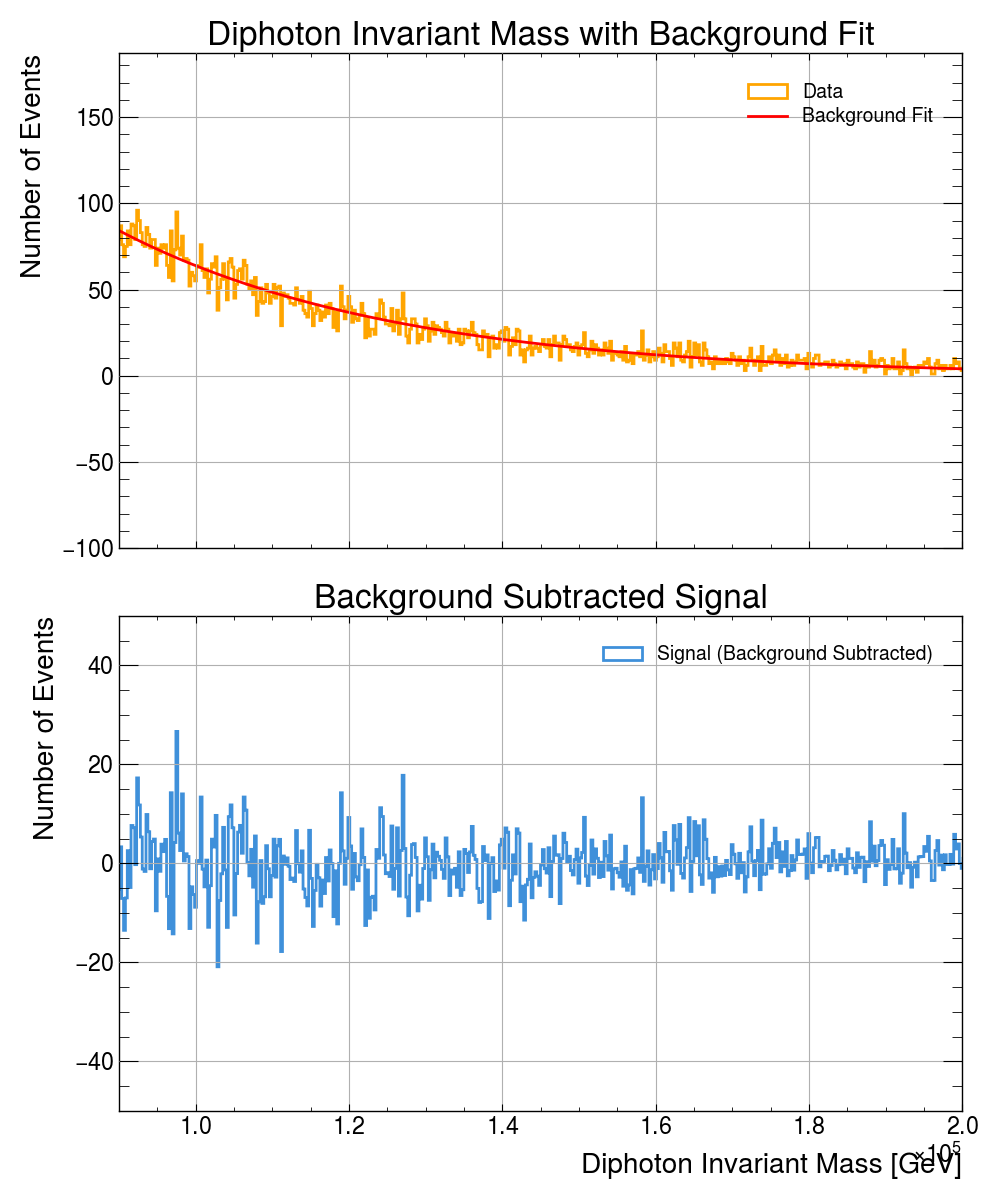

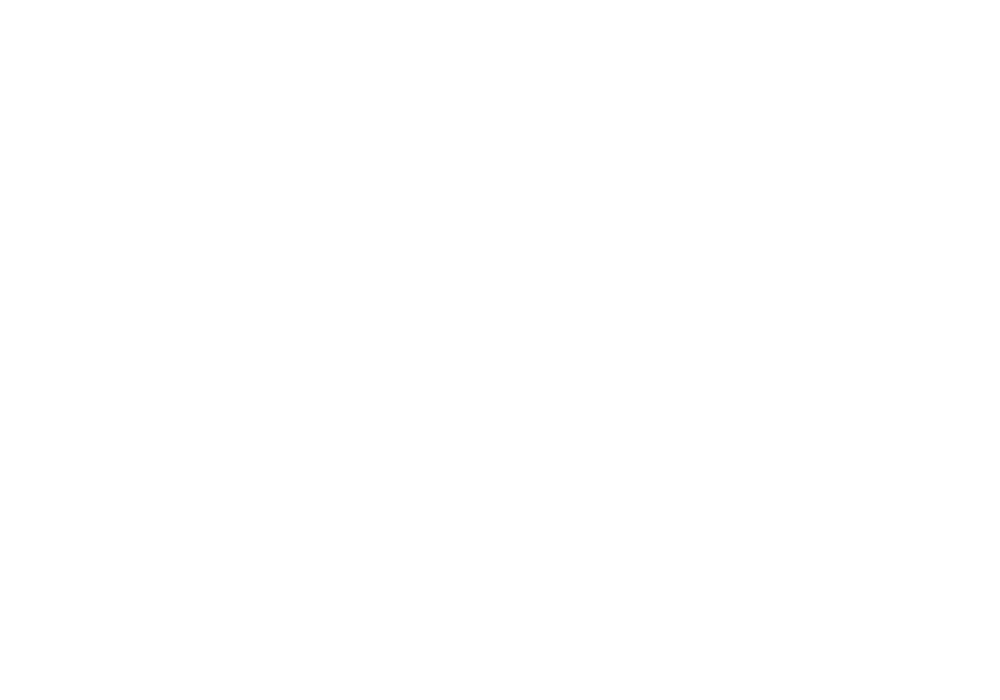

In [86]:
# Plotting the invariant mass distribution
plt.figure(figsize=(10, 7))
hist, bins, _ = plt.hist(masses, bins=5000, histtype='step', linewidth=2, label="Data")
bin_centers = (bins[:-1] + bins[1:]) / 2

# Define an exponential function for the background
def poly_background(x, a, b):
    return a * np.exp(b * x)

param_a = 3500
param_b = 1/100000

# Fit the background in a sideband region (excluding the signal region)
sideband_mask = ((bin_centers > 0.9e5) & (bin_centers < 1.2e5)) | ((bin_centers > 1.3e5) & (bin_centers < 3e5)) # Exclude 115-135 GeV region
popt, _ = curve_fit(poly_background, bin_centers[sideband_mask], hist[sideband_mask], p0=(param_a, param_b))

# Calculate the background across the entire range
background = poly_background(bin_centers, *popt)

# Subtract the background from the original histogram
signal = hist - background

plt.clf()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Subplot 1: Signal + Background fit
ax1.hist(bin_centers, bins=bins, weights=hist, histtype='step', linewidth=2, label="Data", color="orange")
ax1.plot(bin_centers, background, 'r-', label="Background Fit", linewidth=2)
ax1.set_ylabel("Number of Events")
ax1.set_title("Diphoton Invariant Mass with Background Fit")
ax1.legend()
ax1.grid(True)
ax1.set_ylim(-100, max(hist)+50)

# Subplot 2: Background Subtracted Signal
ax2.hist(bin_centers, bins=bins, weights=signal, histtype='step', linewidth=2, label="Signal (Background Subtracted)")
ax2.set_xlabel("Diphoton Invariant Mass [GeV]")
ax2.set_ylabel("Number of Events")
ax2.set_title("Background Subtracted Signal")
ax2.legend()
ax2.grid(True)
ax2.set_ylim(-50, 50)

# Apply ATLAS style for both plots
hep.style.use("ATLAS")

plt.xlim(0.9e5, 2e5)
plt.tight_layout()
plt.show()

In [84]:
# Assuming 'signal' contains the signal (background-subtracted data)
# and 'background' contains the fitted background

# Define the signal region (e.g., 115 GeV to 135 GeV)
signal_region_mask = (bin_centers > 1.2e5) & (bin_centers < 1.3e5)

# Calculate the total signal and background counts in the signal region
S = np.sum(signal[signal_region_mask])
B = np.sum(background[signal_region_mask])

# Calculate the significance
if B > 0:  # Prevent division by zero
    significance = S / np.sqrt(B)
    print(f"Significance: {significance}")
else:
    print("No background events in the region, significance is undefined.")

Significance: -0.8034885840790659
